<a href="https://colab.research.google.com/github/JongHyun070105/MachineLearning2025/blob/main/3710%EB%B0%95%EC%A2%85%ED%98%84_2_Pandas%EC%9D%B4%ED%95%B4_%EB%B0%8F_%ED%99%9C%EC%9A%A9(%EC%8B%A4%EC%8A%B5)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2. Pandas 이해 및 활용

## DataFrame 살펴보기

# __1. DataFrame이 뭔가요?__

>  - DataFrame은 2차원(col과 row을 가짐)테이블 데이터 구조를 가지는 자료형
>  - Data Analysis, Machine Learning에서 data 변형을 위해 가장 많이 사용
>  - **주의** : Series나 DataFrame은 대소문자가 구분되므로 Series, DataFrame으로 사용

In [1]:
# pandas import
import pandas as pd
import numpy as np

# IPython 패키지를 설치하는 명령어(주피터 노트북 환경에서는 보통 사전 설치되어 있음)
# 느낌표 (!)는 주피터 노트북에서 셸 명령어를 실행할 수 있게 해줍니다.
# !pip install Ipython
!pip install Ipython

# IPython.display 모듈에서 Image 클래스를 불러오기
# 이 클래스를 사용하면 노트북에 이미지를 직접 삽입해서 보여줄 수 있음
# Image("image_path.jpg")  # image_path.jpg는 표시할 이미지의 경로
from IPython.display import Image

# from IPython.display import Image

### <b>1-1. DataFrame 만들어 보기</b>

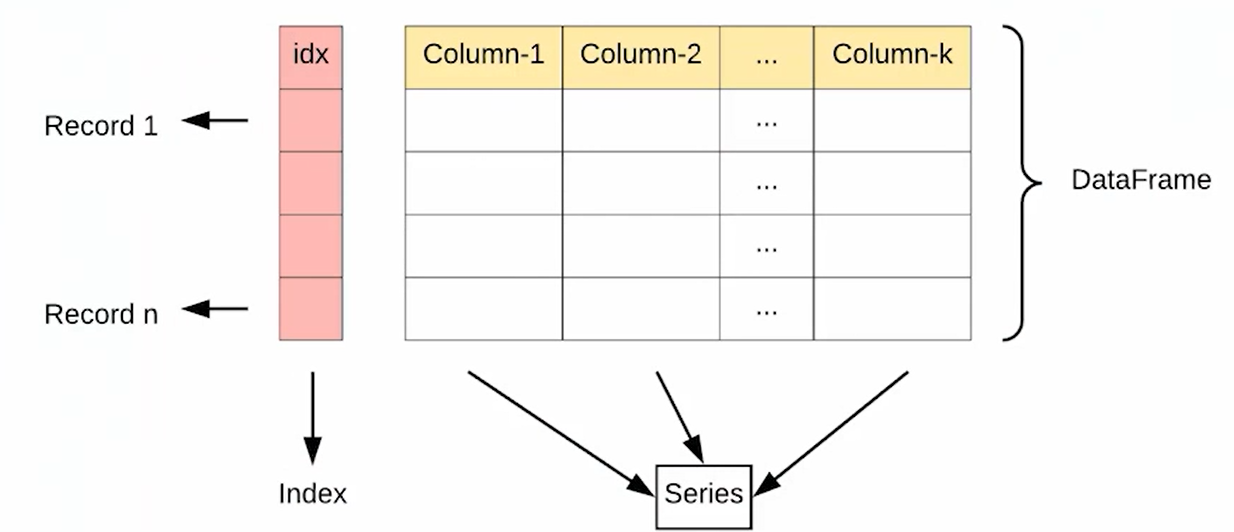

> Dictionary 형으로 생성

In [2]:
a1={"a" : [1,2,3], "b" : [4,5,6], "c" : [7,8,9]}
df_a1 = pd.DataFrame(a1)
df_a1

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


>  List 형태로 데이터 프레임 생성

In [3]:
a2=[[1,2,3], [4,5,6], [7,8,9]]
a2_index=["a","b","c"]
df_a2 = pd.DataFrame(data = a2, index=a2_index)
df_a2

,0,1,2
a,1,2,3
b,4,5,6
c,7,8,9


### <b>1-2. 파일을 읽어서 DataFrame생성하기</b>
> - pandas.read_csv 함수 사용
>  - 대부분의 업무에서는 분석하고자 하는 Datat가 존재할 것
>  - 이를 읽어 들이는 것부터 데이터 분석의 시작!
>  - 이번 실습에서 읽을 파일 : sc_cust_info_txn_v1.5.csv

In [4]:
# sc_cust_info_txn_v1.5.csv을 읽어 cust 데이터프레임 생성하기
# 파일을 수정하고 저장 자체를 MS Office에서 해서 encoding을 cp949로 해주어야 함

cust = pd.read_csv('/content/sc_cust_info_txn_v1.5.csv', encoding='CP949')
cust

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
0,202006,20200630,10001,C,F,28,0,N,N,2640.0000,792.000000,1584.0000,0.0,0.0000,Y
1,202006,20200630,10001,_,_,_,1,N,N,300.0000,90.000000,180.0000,0.0,0.0000,Y
2,202006,20200630,10001,E,F,24,1,N,N,16840.0000,2526.000000,6983.0000,0.0,6981.0000,N
3,202006,20200630,10001,F,F,32,1,N,N,15544.7334,2331.710010,6750.4666,0.0,6508.8000,N
4,202006,20200630,10001,D,M,18,1,N,N,4700.0000,0.000000,4502.0000,0.0,4507.7000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,202006,20200630,10001,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,0.0,852.5499,N
9926,202006,20200630,10001,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,0.0,10603.9266,N
9927,202006,20200630,10005,C,_,_,1,N,N,1396.2000,1206.000000,0.0000,1212.0,0.0000,N
9928,202006,20200630,10001,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,0.0,0.0000,Y


- DataFrame 데이터 살펴보기
>DataFrame의 구조 (인덱스와 컬럼)
 - 인덱스(Index) : 행의 레이블에 대한 정보를 보유하고 있음
 - 컬럼(Columns) : 열의 레이블에 대한 정보를 보유하고 있음
 - 인덱스와 컬럼 자체는 중복값일 수 없음

In [5]:
# 데이터 프레임 출력
cust

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
0,202006,20200630,10001,C,F,28,0,N,N,2640.0000,792.000000,1584.0000,0.0,0.0000,Y
1,202006,20200630,10001,_,_,_,1,N,N,300.0000,90.000000,180.0000,0.0,0.0000,Y
2,202006,20200630,10001,E,F,24,1,N,N,16840.0000,2526.000000,6983.0000,0.0,6981.0000,N
3,202006,20200630,10001,F,F,32,1,N,N,15544.7334,2331.710010,6750.4666,0.0,6508.8000,N
4,202006,20200630,10001,D,M,18,1,N,N,4700.0000,0.000000,4502.0000,0.0,4507.7000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,202006,20200630,10001,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,0.0,852.5499,N
9926,202006,20200630,10001,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,0.0,10603.9266,N
9927,202006,20200630,10005,C,_,_,1,N,N,1396.2000,1206.000000,0.0000,1212.0,0.0000,N
9928,202006,20200630,10001,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,0.0,0.0000,Y


### <b>1-3. 데이터 살펴보기</b>
- head, tail 함수사용하기
> - 데이터 전체가 아닌, 일부(처음부터, 혹은 마지막부터)를 간단히 보기 위한 함수 (default: 5줄)
 - **head, tail을 왜 사용할까?**
   - 광대한 데이터를 다룰 수 있는 Pandas의 특성상 특정변수에 제대로 데이터가 들어갔는지 간략히 확인
   - 데이터 자료형의 확인
   - 각 레이블에 맞는 데이터 매칭 확인

In [6]:
# 상위 3개
cust.head(3)

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
0,202006,20200630,10001,C,F,28,0,N,N,2640.0,792.0,1584.0,0.0,0.0,Y
1,202006,20200630,10001,_,_,_,1,N,N,300.0,90.0,180.0,0.0,0.0,Y
2,202006,20200630,10001,E,F,24,1,N,N,16840.0,2526.0,6983.0,0.0,6981.0,N


In [7]:
#하위 10개
cust.tail(10)

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
9920,202006,20200630,10001,D,M,46,0,N,N,6920.0000,2076.000000,4152.0000,0.0000,0.0000,Y
9921,202006,20200630,10001,D,M,54,1,N,Y,5198.0666,0.000000,4760.8666,0.0000,4749.3000,N
9922,202006,20200630,10001,E,M,65,4,N,N,9115.1334,3209.600000,0.0000,3523.7334,0.0000,N
9923,202006,20200630,10001,C,M,76,1,N,N,1860.0000,1716.000000,0.0000,1722.0000,0.0000,N
9924,202006,20200630,10005,C,_,_,0,N,N,17038.2000,5111.460000,10222.9200,0.0000,0.0000,Y
9925,202006,20200630,10001,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,0.0000,852.5499,N
9926,202006,20200630,10001,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,0.0000,10603.9266,N
9927,202006,20200630,10005,C,_,_,1,N,N,1396.2000,1206.000000,0.0000,1212.0000,0.0000,N
9928,202006,20200630,10001,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,0.0000,0.0000,Y
9929,202006,20200630,10001,C,F,59,1,N,N,2436.9000,365.535000,1839.9000,0.0000,1919.7999,N


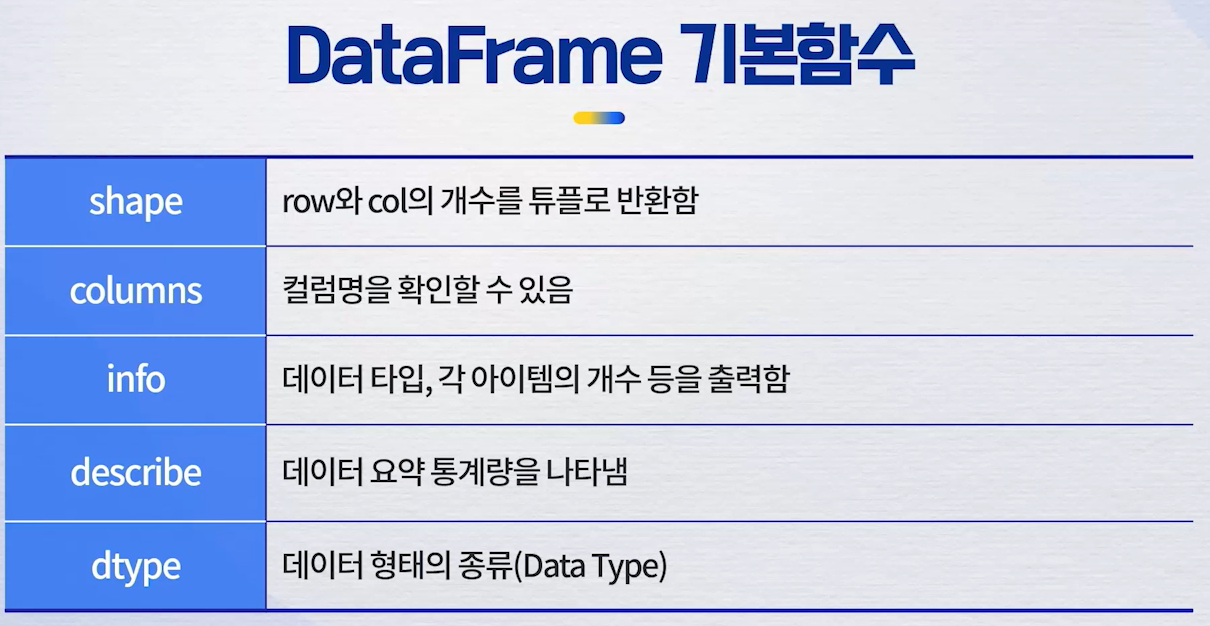

In [8]:
# shape : 데이터를 파악하는데 중요함
cust.shape

(9930, 15)

In [9]:
# DataFrame의 columns들을 보여줌
cust.columns

Index(['base_ym', 'dpro_tgt_perd_val', 'cust_ctg_type', 'cust_class',
       'sex_type', 'age', 'efct_svc_count', 'dt_stop_yn', 'npay_yn',
       'r3m_avg_bill_amt', 'r3m_A_avg_arpu_amt', 'r3m_B_avg_arpu_amt',
       'r6m_A_avg_arpu_amt', 'r6m_B_avg_arpu_amt', 'termination_yn'],
      dtype='object')

In [10]:
# 데이터 타입 및 각 아이템등의 정보를 보여줌
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   base_ym             9930 non-null   int64  
 1   dpro_tgt_perd_val   9930 non-null   int64  
 2   cust_ctg_type       9930 non-null   int64  
 3   cust_class          9930 non-null   object 
 4   sex_type            9930 non-null   object 
 5   age                 9930 non-null   object 
 6   efct_svc_count      9930 non-null   int64  
 7   dt_stop_yn          9930 non-null   object 
 8   npay_yn             9930 non-null   object 
 9   r3m_avg_bill_amt    9930 non-null   float64
 10  r3m_A_avg_arpu_amt  9930 non-null   float64
 11  r3m_B_avg_arpu_amt  9930 non-null   float64
 12  r6m_A_avg_arpu_amt  9930 non-null   float64
 13  r6m_B_avg_arpu_amt  9930 non-null   float64
 14  termination_yn      9930 non-null   object 
dtypes: float64(5), int64(4), object(6)
memory usage: 1.1+ M

In [11]:
# DataFrame의 기본적인 통계정보를 보여줌
cust.describe()

,base_ym,dpro_tgt_perd_val,cust_ctg_type,efct_svc_count,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt
count,9930.0,9930.0,9930.000000,9930.000000,9.930000e+03,9.930000e+03,9.930000e+03,9.930000e+03,9930.000000
mean,202006.0,20200630.0,10001.372810,1.520040,1.181774e+04,1.897536e+03,6.395259e+03,8.496206e+02,4624.897630
std,0.0,0.0,1.605016,15.404037,1.397822e+05,1.235342e+04,8.346138e+04,1.235124e+04,4561.049131
min,202006.0,20200630.0,10001.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,202006.0,20200630.0,10001.000000,1.000000,3.624503e+03,3.240000e+02,1.260000e+03,0.000000e+00,0.000000
50%,202006.0,20200630.0,10001.000000,1.000000,8.284467e+03,1.593307e+03,4.768617e+03,0.000000e+00,3959.316700
75%,202006.0,20200630.0,10001.000000,1.000000,1.372000e+04,2.308360e+03,7.982000e+03,1.006125e+03,7741.006900
max,202006.0,20200630.0,10010.000000,905.000000,1.281568e+07,1.188998e+06,7.689409e+06,1.208498e+06,64947.092000


In [12]:
# DataFrame의 데이터 종류
cust.dtypes

,0
base_ym,int64
dpro_tgt_perd_val,int64
cust_ctg_type,int64
cust_class,object
sex_type,object
age,object
efct_svc_count,int64
dt_stop_yn,object
npay_yn,object
r3m_avg_bill_amt,float64


### <b>1-4. read_csv 함수 파라미터 살펴보기</b>
> - 함수에 커서를 가져다 두고 shift+tab을 누르면 해당 함수의 parameter 볼 수 있음
> - sep - 각 데이터 값을 구별하기 위한 구분자(separator) 설정
> - index_col : index로 사용할 column 설정
> - usecols : 실제로 dataframe에 로딩할 columns만 설정
> - usecols은 index_col을 포함하여야 함

In [13]:
# . read_csv 함수 파라미터 지정하여 파일읽어 데이터프레임 생성cust2
# 파일명 : sc_cust_info_txn_v1.5.csv
# 인덱스 컬럼 : 'cust_class'
# ['cust_class', 'r3m_avg_bill_amt', 'r3m_B_avg_arpu_amt', 'r6m_B_avg_arpu_amt']

cust2 = pd.read_csv('/content/sc_cust_info_txn_v1.5.csv',
                    index_col='cust_class',
                    usecols=['cust_class','r3m_avg_bill_amt','r3m_B_avg_arpu_amt','r6m_B_avg_arpu_amt'])

cust2


,r3m_avg_bill_amt,r3m_B_avg_arpu_amt,r6m_B_avg_arpu_amt
cust_class,,,
C,2640.0000,1584.0000,0.0000
_,300.0000,180.0000,0.0000
E,16840.0000,6983.0000,6981.0000
F,15544.7334,6750.4666,6508.8000
D,4700.0000,4502.0000,4507.7000
...,...,...,...
C,1296.0999,643.1001,852.5499
G,13799.6666,10605.9266,10603.9266
C,1396.2000,0.0000,0.0000


# __2. Data 조회하기__
DataFrame에서 data를 __조회, 수정__해보고 이를 이해해본다.

### <b>1-1. 데이터 추출하기</b>

#### <b>1) column 선택하기</b>

> - 기본적으로 [ ]는 column을 추출 : 특정한 col을기준으로 모델링을 하고자 하는 경우
> - 컬럼 인덱스일 경우 인덱스의 리스트 사용 가능
>   - 리스트를 전달할 경우 결과는 Dataframe
>   - 하나의 컬럼명을 전달할 경우 결과는 Series

#### <b>2) 하나의 컬럼 선택하기</b>

> - Series 형태로 가지고 올 수도, DataFrame형태로 가지고 올 수 있음

In [14]:
# cf : series 형태로 가지고 오기('cust_class')

cust['cust_class']

,cust_class
0,C
1,_
2,E
3,F
4,D
...,...
9925,C
9926,G
9927,C
9928,C


In [15]:
# cf : Dataframe형태로 가지고 오기

cust[['cust_class']]

,cust_class
0,C
1,_
2,E
3,F
4,D
...,...
9925,C
9926,G
9927,C
9928,C


#### <b>3) 복수의 컬럼 선택하기</b>

In [16]:
# 'cust_class' , 'age' 'r3m_avg_bill_amt'등 3개의 col 선택하기

cust[['cust_class','age','r3m_avg_bill_amt']]

,cust_class,age,r3m_avg_bill_amt
0,C,28,2640.0000
1,_,_,300.0000
2,E,24,16840.0000
3,F,32,15544.7334
4,D,18,4700.0000
...,...,...,...
9925,C,15,1296.0999
9926,G,12,13799.6666
9927,C,_,1396.2000
9928,C,40,3140.0000


#### <b>4) DataFrame slicing</b>

>- 특정 **행 범위**를 가지고 오고 싶다면 [ ]를 사용
>- DataFrame의 경우 기본적으로 [ ] 연산자가 **column 선택**에 사용되지만 **slicing은 row 레벨**로 지원

In [17]:
# 7,8,9행을 가지고 옴 (인덱스 기준)

cust[7:10]


,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
7,202006,20200630,10001,D,F,65,1,N,N,4953.9334,987.0000,2700.3999,0.0000,2689.1,N
8,202006,20200630,10001,D,M,60,1,N,N,5503.0000,2093.0001,0.0000,1981.8999,0.0,N
9,202006,20200630,10001,C,F,67,1,N,N,1349.7000,1227.0000,0.0000,985.5000,0.0,N


#### <b>5) row 선택하기</b>

 - DataFrame에서는 기본적으로 **[ ]을 사용하여 column을 선택**
 > __row 선택(두가지 방법이 존재)__
 > - **loc** : Dataframe에 존재하는 **인덱스를 그대로 사용** (인덱스 기준으로 행 데이터 읽기)
 > - **iloc** : Datafrmae에 존재하는 인덱스 상관없이 **0 based index로 사용** (행 번호 기준으로 행 데이터 읽기)
 > - 이 두 함수는 ,를 사용하여 column 선택도 가능


In [18]:
# DataFrame에서 데이터의 전반적인 정보를 한눈에 확인

cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   base_ym             9930 non-null   int64  
 1   dpro_tgt_perd_val   9930 non-null   int64  
 2   cust_ctg_type       9930 non-null   int64  
 3   cust_class          9930 non-null   object 
 4   sex_type            9930 non-null   object 
 5   age                 9930 non-null   object 
 6   efct_svc_count      9930 non-null   int64  
 7   dt_stop_yn          9930 non-null   object 
 8   npay_yn             9930 non-null   object 
 9   r3m_avg_bill_amt    9930 non-null   float64
 10  r3m_A_avg_arpu_amt  9930 non-null   float64
 11  r3m_B_avg_arpu_amt  9930 non-null   float64
 12  r6m_A_avg_arpu_amt  9930 non-null   float64
 13  r6m_B_avg_arpu_amt  9930 non-null   float64
 14  termination_yn      9930 non-null   object 
dtypes: float64(5), int64(4), object(6)
memory usage: 1.1+ M

In [19]:
# arange함수는 10부터 19에서 끝나도록 간격을 1로 반환

cp = np.arange(10,20)
cp

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [20]:
#index를 100부터 달아주기


cust.index = np.arange(100,10030)
cust

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
100,202006,20200630,10001,C,F,28,0,N,N,2640.0000,792.000000,1584.0000,0.0,0.0000,Y
101,202006,20200630,10001,_,_,_,1,N,N,300.0000,90.000000,180.0000,0.0,0.0000,Y
102,202006,20200630,10001,E,F,24,1,N,N,16840.0000,2526.000000,6983.0000,0.0,6981.0000,N
103,202006,20200630,10001,F,F,32,1,N,N,15544.7334,2331.710010,6750.4666,0.0,6508.8000,N
104,202006,20200630,10001,D,M,18,1,N,N,4700.0000,0.000000,4502.0000,0.0,4507.7000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,202006,20200630,10001,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,0.0,852.5499,N
10026,202006,20200630,10001,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,0.0,10603.9266,N
10027,202006,20200630,10005,C,_,_,1,N,N,1396.2000,1206.000000,0.0000,1212.0,0.0000,N
10028,202006,20200630,10001,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,0.0,0.0000,Y


In [21]:
# DataFrame의 마지막 몇 개 행을 확인
cust.tail()

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
10025,202006,20200630,10001,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,0.0,852.5499,N
10026,202006,20200630,10001,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,0.0,10603.9266,N
10027,202006,20200630,10005,C,_,_,1,N,N,1396.2000,1206.000000,0.0000,1212.0,0.0000,N
10028,202006,20200630,10001,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,0.0,0.0000,Y
10029,202006,20200630,10001,C,F,59,1,N,N,2436.9000,365.535000,1839.9000,0.0,1919.7999,N


In [22]:
#한개의 row만 가지고 오기

cust.loc[[200]]


,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
200,202006,20200630,10001,E,M,61,1,N,N,9526.77,1878.9,6781.8,0.0,6779.9,N


In [23]:
#여러개의 row 가지고 오기

cust.loc[[200,201,202]]

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
200,202006,20200630,10001,E,M,61,1,N,N,9526.7700,1878.9,6781.8000,0.0,6779.9000,N
201,202006,20200630,10001,G,F,35,1,N,N,15032.8667,1704.0,11562.9858,0.0,11560.9858,N
202,202006,20200630,10010,_,_,_,1,N,N,22362.9333,2082.0,9410.0000,0.0,9408.0000,N


In [24]:
#iloc과비교(위와 같은 값을 가지고 오려면...)

cust.iloc[100:103]


,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
200,202006,20200630,10001,E,M,61,1,N,N,9526.7700,1878.9,6781.8000,0.0,6779.9000,N
201,202006,20200630,10001,G,F,35,1,N,N,15032.8667,1704.0,11562.9858,0.0,11560.9858,N
202,202006,20200630,10010,_,_,_,1,N,N,22362.9333,2082.0,9410.0000,0.0,9408.0000,N


- row, column 동시에 선택하기
 > loc, iloc 속성을 이용할 때, 콤마를 이용하여 row와 col 다 명시 가능

In [25]:
# 100, 200, 300 대상으로 cust_class, sex_type, age, r3m_avg_bill_amt, r3m_A_avg_arpu_amt  col 가지고 오기(loc사용)
# row, col

cust.loc[[100,200,300],['cust_class','sex_type','age','r3m_avg_bill_amt','r3m_A_avg_arpu_amt']]


,cust_class,sex_type,age,r3m_avg_bill_amt,r3m_A_avg_arpu_amt
100,C,F,28,2640.00000,792.0000
200,E,M,61,9526.77000,1878.9000
300,D,M,84,11622.37472,2716.7952


In [26]:
# 같은 형태로 iloc사용하기 (index를 level로 가지고 오기)
# 100, 200, 300 대상으로 cust_class, sex_type, age, r3m_avg_bill_amt, r3m_A_avg_arpu_amt  col 가지고 오기(iloc사용)


cust.iloc[[0,100,200],[3,4,5,9,10]]

,cust_class,sex_type,age,r3m_avg_bill_amt,r3m_A_avg_arpu_amt
100,C,F,28,2640.00000,792.0000
200,E,M,61,9526.77000,1878.9000
300,D,M,84,11622.37472,2716.7952


In [27]:
# 100, 200, 300 대상으로 cust_class, sex_type, age, r3m_avg_bill_amt, r3m_A_avg_arpu_amt  col 가지고 오기(loc사용 : 에러발생 함)
# row, col

#### __6) boolean selection 연산으로 row 선택하기 (= 컬럼 조건문으로 행 추출하기)__

 - 해당 조건에 맞는 row만 선택
 - 조건을 명시하고 조건을 명시한 형태로 inedxing 하여 가지고 옴

In [28]:
# ex: 남자이면서 3개월 평균 청구 금액이 50000 이상이면서 100000 미만인 사람만 가지고오기
#조건을 전부다  [ ]안에 넣어 주면 됨
extract = cust[(cust['sex_type'] == 'M') & (cust['r3m_avg_bill_amt'] >= 50000) & (cust['r3m_avg_bill_amt'] < 100000)]


extract.head()

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
472,202006,20200630,10001,F,M,28,1,N,N,65113.66670,1310.4000,20083.5033,0.0,19426.1983,N
1149,202006,20200630,10001,D,M,20,2,N,N,80335.67685,69136.1001,3896.3334,0.0,3727.6666,N
1464,202006,20200630,10001,_,M,45,1,N,Y,54865.70000,2321.8666,8744.9382,0.0,8774.7162,N
1893,202006,20200630,10001,G,M,48,1,N,N,64804.34037,47599.4501,11313.5866,0.0,11351.4984,N
2127,202006,20200630,10001,G,M,47,1,N,Y,55368.98422,37432.2666,12903.1736,0.0,12901.1736,N


In [29]:
# 조건문이 너무 길어지거나 복잡해지면...아래와 같은 방식으로 해도 무방함
# 남자이면서
sm = cust['sex_type'] == 'M'


# 3개월 평균 청구 금액이 50000 이상이면서 100000 미만
bill = (cust['r3m_avg_bill_amt'] >= 50000) & (cust['r3m_avg_bill_amt'] < 100000)

cust[sm & bill].head()

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
472,202006,20200630,10001,F,M,28,1,N,N,65113.66670,1310.4000,20083.5033,0.0,19426.1983,N
1149,202006,20200630,10001,D,M,20,2,N,N,80335.67685,69136.1001,3896.3334,0.0,3727.6666,N
1464,202006,20200630,10001,_,M,45,1,N,Y,54865.70000,2321.8666,8744.9382,0.0,8774.7162,N
1893,202006,20200630,10001,G,M,48,1,N,N,64804.34037,47599.4501,11313.5866,0.0,11351.4984,N
2127,202006,20200630,10001,G,M,47,1,N,Y,55368.98422,37432.2666,12903.1736,0.0,12901.1736,N


#### <b>7) 정리 </b>

- 기본적인 대괄호는 col을 가지고 오는 경우 사용, 하지만 slicing은 row를 가지고 온다.
- row를 가지고 오는 경우는 loc과 iloc을 사용하는데, loc과 iloc은 컬럼과 row를 동시에 가지고 올 수 있다.

In [30]:
# Matplotlib의 서브 모듈 pyplot을 불러오는 코드

import matplotlib.pyplot as plt

### <b>1-2. 데이터 추가하기</b>

#### <b>1) 새 column 추가하기</b>

>- 데이터 전처리 과정에서 빈번하게 발생하는 것
>- insert 함수 사용하여 원하는 위치에 추가하기

In [31]:
# r3m_avg_bill_amt 두배로 새로운 col만들기(기존 col에 연산을 하여 새로운 컬럼 추가)
cust['r3m_avg_bill_amt2'] = cust['r3m_avg_bill_amt'] * 2

cust[['r3m_avg_bill_amt','r3m_avg_bill_amt2']]


,r3m_avg_bill_amt,r3m_avg_bill_amt2
100,2640.0000,5280.0000
101,300.0000,600.0000
102,16840.0000,33680.0000
103,15544.7334,31089.4668
104,4700.0000,9400.0000
...,...,...
10025,1296.0999,2592.1998
10026,13799.6666,27599.3332
10027,1396.2000,2792.4000
10028,3140.0000,6280.0000


In [32]:
# 기존에 col을 연산하여 새로운 데이터 생성 ('r3m_avg_bill_amt2' + 'r3m_avg_bill_amt')
cust['r3m_avg_bill_amt3'] = cust['r3m_avg_bill_amt2'] + cust['r3m_avg_bill_amt']
cust[['r3m_avg_bill_amt2','r3m_avg_bill_amt2','r3m_avg_bill_amt3']]



,r3m_avg_bill_amt2,r3m_avg_bill_amt2,r3m_avg_bill_amt3
100,5280.0000,5280.0000,7920.0000
101,600.0000,600.0000,900.0000
102,33680.0000,33680.0000,50520.0000
103,31089.4668,31089.4668,46634.2002
104,9400.0000,9400.0000,14100.0000
...,...,...,...
10025,2592.1998,2592.1998,3888.2997
10026,27599.3332,27599.3332,41398.9998
10027,2792.4000,2792.4000,4188.6000
10028,6280.0000,6280.0000,9420.0000


In [33]:
# 새로은 col들은 항상맨뒤에 존재 원하는 위치에 col을 추가하고자 하는 경우
# 위치를 조절 하고 싶다면(insert함수 사용)
# 0부터 시작하여 10번째 col에 insert

cust.insert(2,'r3m_avg_bill_amt222',cust['r3m_avg_bill_amt'] * 10)
cust.head()

,base_ym,dpro_tgt_perd_val,r3m_avg_bill_amt222,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn,r3m_avg_bill_amt2,r3m_avg_bill_amt3
100,202006,20200630,26400.000,10001,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,0.0,0.0,Y,5280.0000,7920.0000
101,202006,20200630,3000.000,10001,_,_,_,1,N,N,300.0000,90.00000,180.0000,0.0,0.0,Y,600.0000,900.0000
102,202006,20200630,168400.000,10001,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0.0,6981.0,N,33680.0000,50520.0000
103,202006,20200630,155447.334,10001,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0.0,6508.8,N,31089.4668,46634.2002
104,202006,20200630,47000.000,10001,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0.0,4507.7,N,9400.0000,14100.0000


#### __2) column 삭제하기__

>- drop 함수 사용하여 삭제
>- axis는 삭제를 가로(행)기준으로 할 것인지, 세로(열)기준으로 할 것인지 명시하는 'drop()'메소드의 파라미터임
>- 리스트를 사용하면 멀티플 col 삭제 가능

In [34]:
# axis : dataframe은 차원이 존재 함으로 항상 0과 1이 존재
# (0은 행레벨, 1을 열 레벨)

cust.drop('r3m_avg_bill_amt222',axis = 1)
cust.head()

,base_ym,dpro_tgt_perd_val,r3m_avg_bill_amt222,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn,r3m_avg_bill_amt2,r3m_avg_bill_amt3
100,202006,20200630,26400.000,10001,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,0.0,0.0,Y,5280.0000,7920.0000
101,202006,20200630,3000.000,10001,_,_,_,1,N,N,300.0000,90.00000,180.0000,0.0,0.0,Y,600.0000,900.0000
102,202006,20200630,168400.000,10001,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0.0,6981.0,N,33680.0000,50520.0000
103,202006,20200630,155447.334,10001,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0.0,6508.8,N,31089.4668,46634.2002
104,202006,20200630,47000.000,10001,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0.0,4507.7,N,9400.0000,14100.0000


In [39]:
#원본 데이터를 열어 보면 원본 데이터는 안 지워진 상태

cust.head()


,base_ym,dpro_tgt_perd_val,r3m_avg_bill_amt222,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn,r3m_avg_bill_amt2,r3m_avg_bill_amt3
100,202006,20200630,26400.000,10001,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,0.0,0.0,Y,5280.0000,7920.0000
101,202006,20200630,3000.000,10001,_,_,_,1,N,N,300.0000,90.00000,180.0000,0.0,0.0,Y,600.0000,900.0000
102,202006,20200630,168400.000,10001,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0.0,6981.0,N,33680.0000,50520.0000
103,202006,20200630,155447.334,10001,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0.0,6508.8,N,31089.4668,46634.2002
104,202006,20200630,47000.000,10001,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0.0,4507.7,N,9400.0000,14100.0000


In [40]:
# 원본 데이터를 지우고자 한다면...
# 방법1 : 데이터를 지우고 다른 데이터 프레임에 저장

cust = cust.drop('r3m_avg_bill_amt222',axis = 1)


In [41]:
# 원본 자체를 지우고자 한다면...
# 방법 2 : inplace 파라미터를 할용 True인 경우 원본데이터에 수행
cust.drop('r3m_avg_bill_amt222',axis = 1, inplace = True)


KeyError: "['r3m_avg_bill_amt222'] not found in axis"

In [42]:
# 원본확인
cust


,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn,r3m_avg_bill_amt2,r3m_avg_bill_amt3
100,202006,20200630,10001,C,F,28,0,N,N,2640.0000,792.000000,1584.0000,0.0,0.0000,Y,5280.0000,7920.0000
101,202006,20200630,10001,_,_,_,1,N,N,300.0000,90.000000,180.0000,0.0,0.0000,Y,600.0000,900.0000
102,202006,20200630,10001,E,F,24,1,N,N,16840.0000,2526.000000,6983.0000,0.0,6981.0000,N,33680.0000,50520.0000
103,202006,20200630,10001,F,F,32,1,N,N,15544.7334,2331.710010,6750.4666,0.0,6508.8000,N,31089.4668,46634.2002
104,202006,20200630,10001,D,M,18,1,N,N,4700.0000,0.000000,4502.0000,0.0,4507.7000,N,9400.0000,14100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,202006,20200630,10001,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,0.0,852.5499,N,2592.1998,3888.2997
10026,202006,20200630,10001,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,0.0,10603.9266,N,27599.3332,41398.9998
10027,202006,20200630,10005,C,_,_,1,N,N,1396.2000,1206.000000,0.0000,1212.0,0.0000,N,2792.4000,4188.6000
10028,202006,20200630,10001,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,0.0,0.0000,Y,6280.0000,9420.0000


<br><br>